<a href="https://colab.research.google.com/github/IrinaIsobel/food-sales-predictions/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSneA58lbwC6aQ6kDKUMgY7t3V_fVQkMF6n-wXIBWpvzHH20Rx0UDQYufcWhZ7TTdVUjrPwabuKua-C/pub?output=csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Cleaning

In [2]:
data.shape

(8523, 12)

In [3]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe(include = 'all').round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


#Identifying Duplicates

In [6]:
data.duplicated().sum()

0

#Identifying and Handling Null Data

In [7]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Checking to see if there is a pattern/correlation within missing weight values.

missing_weight = data[data['Item_Weight'].isna()]
missing_weight['Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [9]:
missing_weight['Outlet_Location_Type'].value_counts()

Tier 3    935
Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [10]:
missing_weight['Outlet_Establishment_Year'].value_counts()

# It seems like all missing weight data comes from 1985

1985    1463
Name: Outlet_Establishment_Year, dtype: int64

In [11]:
# Checking to see if there is a pattern/correlation between missing outlet size values.

missing_outlet_size = data[data['Outlet_Size'].isna()]
missing_outlet_size['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [12]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
data[['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']].value_counts()

# Looks like all missing Grocery Store sizes are Tier 3, and missing Supermarket Type 1 are Tier 2.

Outlet_Size  Outlet_Type        Outlet_Location_Type
Medium       Supermarket Type3  Tier 3                  935
High         Supermarket Type1  Tier 3                  932
Medium       Supermarket Type1  Tier 1                  930
Small        Supermarket Type1  Tier 1                  930
                                Tier 2                  930
Medium       Supermarket Type2  Tier 3                  928
Small        Grocery Store      Tier 1                  528
dtype: int64

In [14]:
grocery_filter = data['Outlet_Type'] == 'Grocery Store'
data[grocery_filter][['Outlet_Type', 'Outlet_Size']].head()

,Outlet_Type,Outlet_Size
3,Grocery Store,NaN
23,Grocery Store,Small
28,Grocery Store,NaN
29,Grocery Store,Small
30,Grocery Store,NaN


In [15]:
missing_outlet_size['Outlet_Establishment_Year'].value_counts()

2002    929
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
missing_outlet_size['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [17]:
missing_outlet_size['Outlet_Identifier'].value_counts()

# There doesn't seem to be a clear pattern in missing size data.

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [18]:
# There are a large amount of missing values.
# I will replace missing weight data with average weight.

avg_weight = data['Item_Weight'].mean().round(4)
avg_weight

12.8576

In [19]:
data['Item_Weight'].fillna(avg_weight, inplace = True)
data['Outlet_Size'].fillna('Missing', inplace = True)
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Identifying and Fixing Inconsistent Data

In [20]:
data.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.6000      LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            12.8576      Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Medium       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.7850       Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Missing      Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009

In [21]:
data.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,4,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857637,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.226124,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,9.310000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.857600,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.000000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [22]:
data['Item_Fat_Content'].value_counts()

# Looks like there is inconsistent data here.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
data.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace = True)
data['Item_Fat_Content'].value_counts()

# I have replaced all inconsistencies.

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [26]:
data['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [27]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [28]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [29]:
data['Outlet_Establishment_Year'].value_counts()

# No other inconsistencies found.

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#Data should now be clean and consistent!

In [30]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Missing,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [31]:
data.describe(include="all").round(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000,8523,8523.000,8523,8523.000,8523,8523.000,8523,8523,8523,8523.000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,4,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.858,NaN,0.066,NaN,140.993,NaN,1997.832,NaN,NaN,NaN,2181.289
std,NaN,4.226,NaN,0.052,NaN,62.275,NaN,8.372,NaN,NaN,NaN,1706.500
min,NaN,4.555,NaN,0.000,NaN,31.290,NaN,1985.000,NaN,NaN,NaN,33.290
25%,NaN,9.310,NaN,0.027,NaN,93.826,NaN,1987.000,NaN,NaN,NaN,834.247
50%,NaN,12.858,NaN,0.054,NaN,143.013,NaN,1999.000,NaN,NaN,NaN,1794.331
75%,NaN,16.000,NaN,0.095,NaN,185.644,NaN,2004.000,NaN,NaN,NaN,3101.296


# Project 1 = Part 3 - Visualization

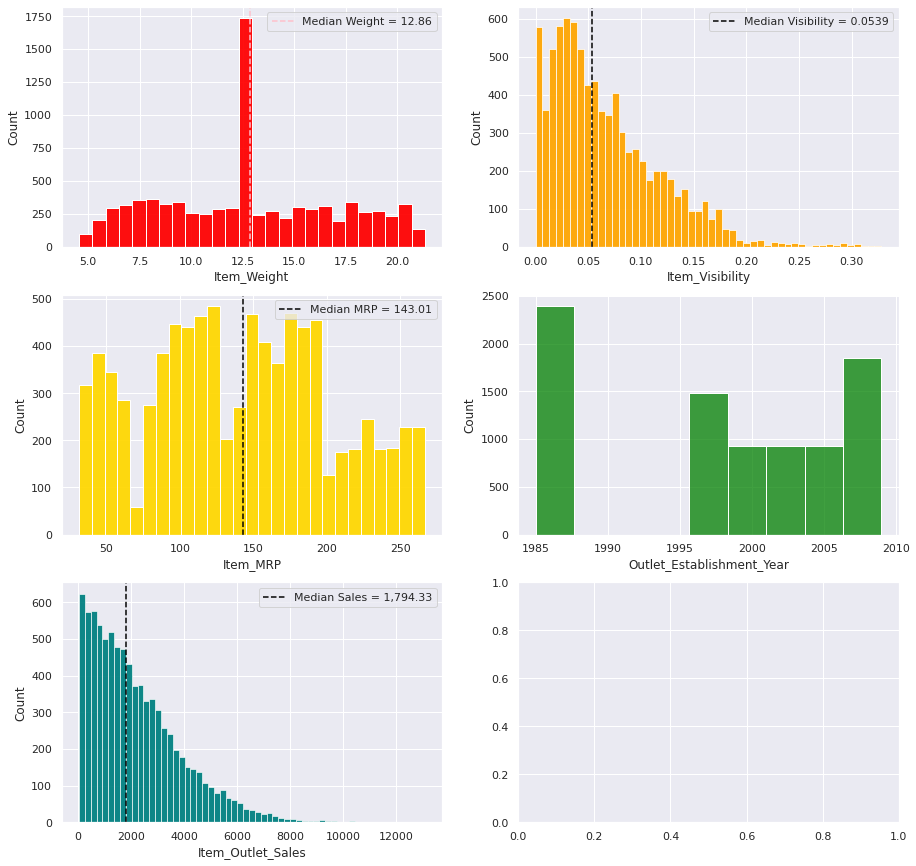

In [32]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

ax = sns.histplot(data=data, x="Item_Weight", color="red", ax=axs[0, 0])
ax1 = sns.histplot(data=data, x="Item_Visibility", color="orange", ax=axs[0, 1])
ax2 = sns.histplot(data=data, x="Item_MRP", color="gold", ax=axs[1, 0])
ax3 = sns.histplot(data=data, x="Item_Outlet_Sales", color="teal", ax=axs[2, 0])


weight_median = data['Item_Weight'].median()
vis_median = data['Item_Visibility'].median()
mrp_median = data['Item_MRP'].median()
sales_median = data['Item_Outlet_Sales'].median()

sns.histplot(data=data, x="Item_Weight", color="red", ax=axs[0, 0])
ax.axvline(weight_median, color = 'pink', ls = '--', label = f'Median Weight = {weight_median:,.2f}')
ax.legend()

sns.histplot(data=data, x="Item_Visibility", color="orange", ax=axs[0, 1])
ax1.axvline(vis_median, color = 'black', ls = '--', label = f'Median Visibility = {vis_median:,.4f}')
ax1.legend()

sns.histplot(data=data, x="Item_MRP", color="gold", ax=axs[1, 0])
ax2.axvline(mrp_median, color = 'black', ls = '--', label = f'Median MRP = {mrp_median:,.2f}')
ax2.legend()

sns.histplot(data=data, x="Outlet_Establishment_Year", color="green", ax=axs[1, 1], bins = 9)

sns.histplot(data=data, x="Item_Outlet_Sales", color="teal", ax=axs[2, 0])
ax3.axvline(sales_median, color = 'black', ls = '--', label = f'Median Sales = {sales_median:,.2f}')
ax3.legend();

In [33]:
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

# 

- Since all missing item weight came from 1985, the 1463 values that were replaced with the average weight (12.86) have become the most prevalent value.
  - Otherwise, most item weights are evenly distrubuted.

- Highest item visiblity falls around 0.03

- Highest item MRP falls around 125, while the lowest falls around 70.

- The most outlets were established in the year of 1985.
  - With the exception of 1998, all following years established around 930.

- The highest value count of item sales fall into the range of 0 - 2000, afterwards steadily declining.

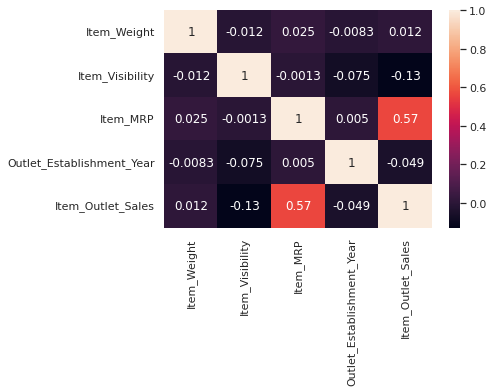

In [34]:
# Studying correlations within our data.

corr = data.corr()
sns.heatmap(corr, annot = True);

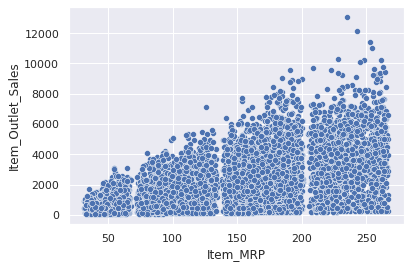

In [35]:
sns.scatterplot(data = data, x = 'Item_MRP', y = 'Item_Outlet_Sales');

- There is a moderate correlation between Item Outlet Sales and Item MRP.
- There is a slight correlation between Item Visibility and Outlet Sales.
- All other correlations are negligible.

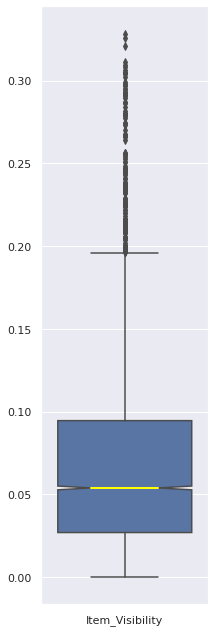

In [71]:
sns.boxplot(data=data[['Item_Visibility']],
            notch = True,
            medianprops = dict(color = 'yellow', linewidth = 2));

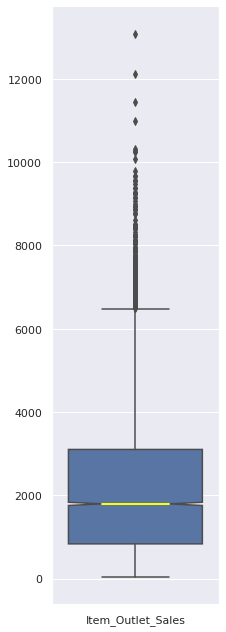

In [70]:
sns.boxplot(data = data[['Item_Outlet_Sales']],
            notch = True,
            medianprops = dict(color = 'yellow', linewidth = 2));

- Several outlier values for both item visibility and item outlet sales fall outside of respective highest values.